# 데이터 정제 및 탐색적분석

In [1]:
# 한글설치 (윈도우 버전)
import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

### 데이터 정제 연습 (P 23)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

In [6]:
# 24 Page
df_raw = pd.read_csv("C:/청년AI.BigData아카데미/data/FITNESS_결측.CSV", encoding = "euc-kr")
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [7]:
# 25 Page
# 결측치 확인 : pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().head()  # NaN이 존재하면 True 표시

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [8]:
df_raw.isna().head()  # isnull()과  동일

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [9]:
# 개인코딩 
df_raw[df_raw['WEIGHT'].isnull()]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
18,Ralph,남성,43,40대,NaN,49.091,10.85,162,64,170


In [10]:
# 26 Page
# 결측치(True) 현황 요약 :sum 함수
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [11]:
# 27 Page
# 문자형 결측치 처리:pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [12]:
# 28 Page
# 숫자형 결측치 처리 :groupby(범주형 변수), agg("집계함수")
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [13]:
# 29 Page
df_raw["WEIGHT"] = df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


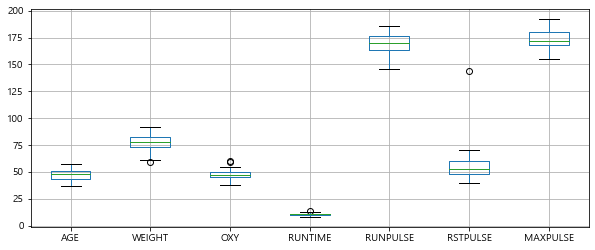

In [14]:
# 30 Page
# boxplot: 상자수염도, figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10, 4))

In [15]:
# 31 Page
# RSTPULSE 변수에서 이상치(100보다 큰 값) 확인 : True/False로 표시
df_raw["RSTPULSE"] >= 100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [16]:
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [17]:
# 조건 해당 자료 직접 확인
df_raw [(df_raw["RSTPULSE"] >= 100) ]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [18]:
# 32 Page
# RSTPULSE 변수에서 이상치 제외(100 이하)
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness    # 자료 수가 줄어듬

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [19]:
# 자료 index reset :DafaFrame.reset_index
df_fitness.reset_index(drop = True, inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [20]:
# 33 Page
# select_dtypes 조건으로 변수 유형 선택 :select_dtypes="object"-문자형 변수
# 숫자형 변수 선택 : select_dtypes="object" 제외
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [21]:
# 문자형 변수 선택 : select_dtypes="object" 선택
df_fitness_char = df_fitness.select_dtypes(include = "object")
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [22]:
# 34 Page
# scale변환: 평균,표준편차 기준
df_scale_std = scale(df_fitness_num)  
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [23]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [24]:
# 개인코딩
df_scale_std.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [25]:
# 35 Page
# scale변환: 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [26]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [27]:
# 36 Page
# scale변환: 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [28]:
# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [29]:
# 37 Page
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]  #df_fitness 사용 가능(동일)
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [30]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028641ADCBE0>,
      dtype=object)

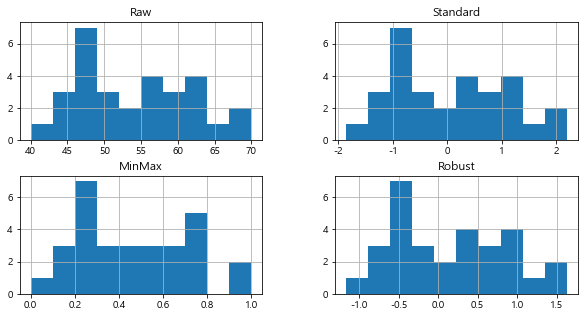

In [31]:
# pandas의 DataFrame.hist 이용(figsize = (x축 크기, y축 크기)
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize = (10,5))

### 탐색적분석 연습 (P 49)

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc('font', family='Malgun Gothic')

In [34]:
# 50 Page
df_fitness = pd.read_csv("C:/청년AI.BigData아카데미/data/FITNESS.CSV", encoding ="euc-kr")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [35]:
# 환율.CSV 데이터 가져오기. 파일 이름에 한글 포함되어 있는 경우
# engine = "python" 지정, parse_dates:날짜 변수 지정
df_currency = pd.read_csv("C:/청년AI.BigData아카데미/data/환율.CSV", engine ="python",parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


### 그래프분석_Bar Chart 연습 (P 53)

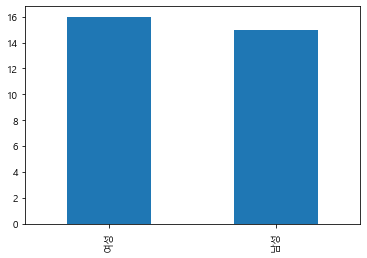

In [36]:
# DataFrame["변수"].value_counts() : 개별(1개) 범주형 변수의 자료 수 계산 
# 성별 Bar Chart
df_count =  df_fitness["GENDER"].value_counts()
df_count.plot.bar()

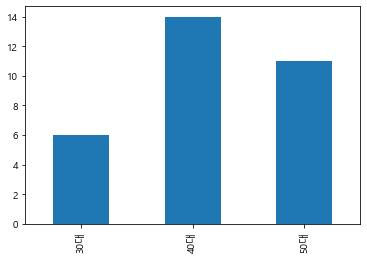

In [37]:
# 연령대 Bar Chart
df_count =  df_fitness["AGEGROUP"].value_counts()
# sort_index(inplace = True) : 정렬 결과를 저장 
df_count.sort_index(inplace = True);
df_count.plot.bar()

In [38]:
# 성별+연령대 Bar Chart
# groupby(column):column기준 자료 요약,  as_index: groupby 변수의 index로 사용 여부 
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_groupby_total

GENDER  AGEGROUP
남성      30대         4
        40대         6
        50대         5
여성      30대         2
        40대         8
        50대         6
dtype: int64

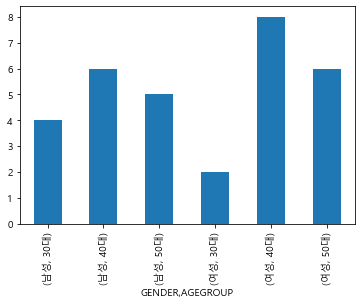

In [39]:
#df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"],as_index = False).agg("count") 위와 동일
df_groupby_total.plot.bar()

### 그래프분석_히스토그램 연습 (P 57)

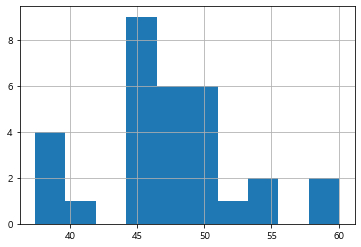

In [40]:
# pandas의 DataFrame.hist method 이용 : OXY에 대한 히스토그램 생성  
df_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286420A3B50>,
      dtype=object)

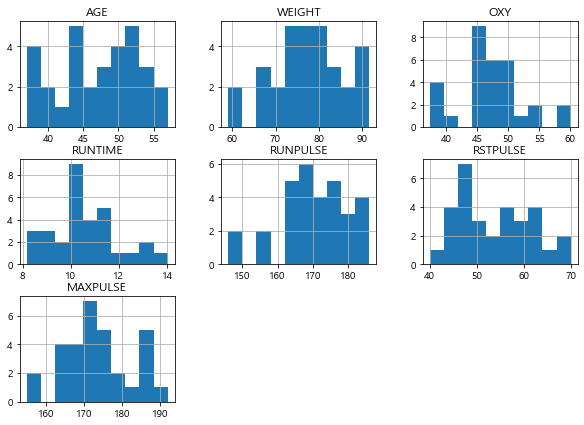

In [41]:
# 58 Page
# hist(figsiz) : figsize = (x축 크기, y축 크기)-그래프 영역별 중첩 처리
df_fitness.hist(figsize = (10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028642367C40>,
      dtype=object)

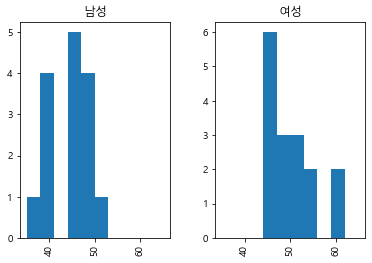

In [42]:
# 59 Page
# hist(column = 변수, by = 그룹변수, range=(최소값, 최대값))-X축 범위 통일
df_fitness.hist( column="OXY" , by = "GENDER" , range=(35,65))

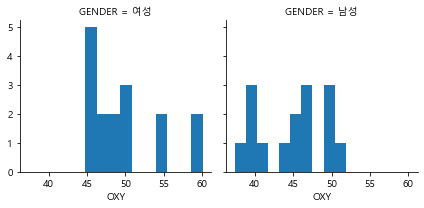

In [43]:
# seaborn사용. FacetGrid(데이터 지정, col=컬럼 지정):지정된 컬럼의 범주별 그리드 영역 생성. Y축 범위 동일
grid = sns.FacetGrid(df_fitness, col ="GENDER")
# map(함수, 문자형 컬럼명):범주별 히스토그램 생성
grid.map(plt.hist, "OXY")

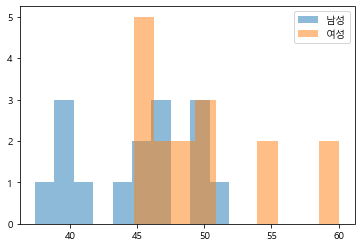

In [44]:
# 60 Page
# matplotlib.pyplot,hist method 이용하여 중첩 histogram 생성 
# hist(변수,label="표시 값" , alpha = 투명도(0~1 지정) )
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

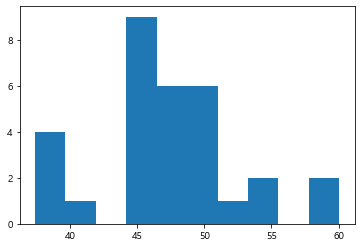

In [45]:
# 61 Page
# hist(변수,data)  
plt.hist(x = "OXY", data = df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

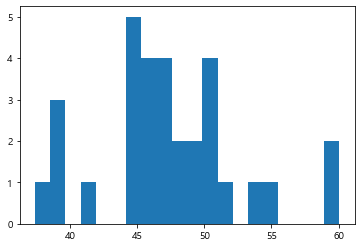

In [46]:
# x축 구간(bin) 조정(상세 분포 확인)
plt.hist(x = "OXY", data = df_fitness, bins = 20)

### 그래프분석_BoxPlot 연습 (P 64)

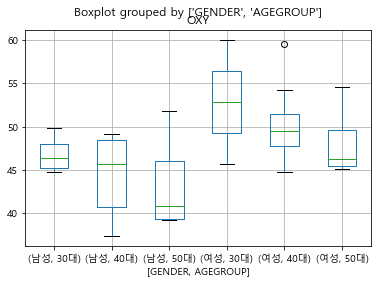

In [47]:
# boxplot(column= 변수, by=  그룹 변수) 
df_fitness.boxplot(column="OXY", by = ["GENDER", "AGEGROUP"])

### 그래프분석_Pie Chart (P 67)

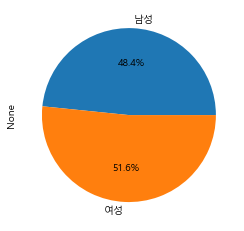

In [48]:
# 성별 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

In [49]:
df_count

GENDER
남성    15
여성    16
dtype: int64

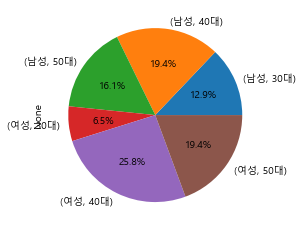

In [50]:
# 성별+연령대 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

### 그래프분석_Scatter Plot (P 71)

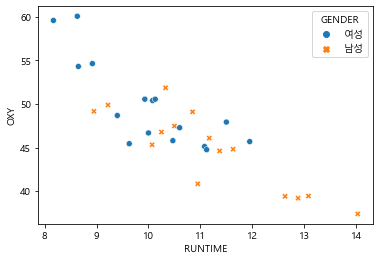

In [51]:
# seaborn.scatterplot method 이용 
# scatterplot( x, y, hue: 그룹 변수, style : 그룹별 marker 구분 ,  data )
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style= "GENDER", data = df_fitness)

### 그래프분석_Scatter Matrix (P 74)

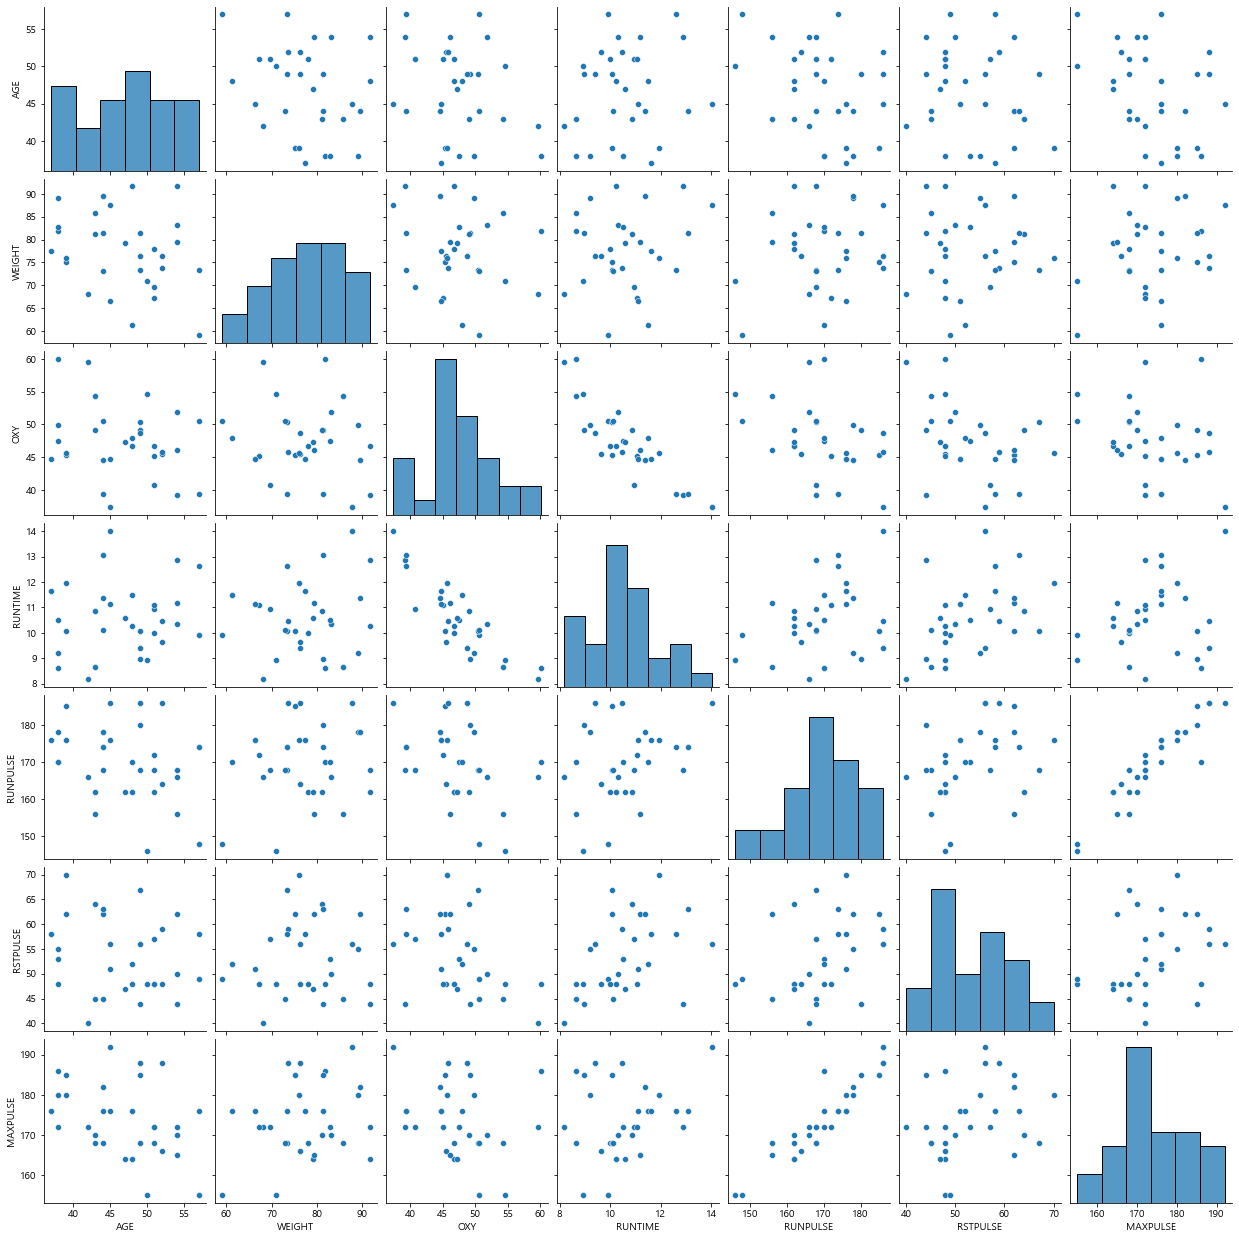

In [52]:
# 전체 변수 간의 관계 Scatter Matrix 생성
# pairplot(데이터): Scatter Plot  그래프 생성
sns.pairplot(df_fitness)

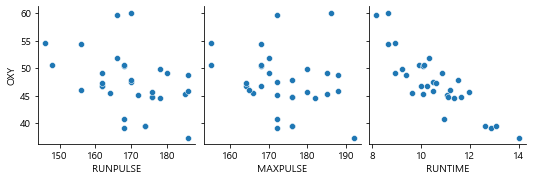

In [53]:
# y변수: 혈당산소 요구량, x변수: 맥박(운동), 맥박(최대), 운동시간 Scatter Matrix 생성
# pairplot(데이터, y_vars = y축 변수 , x_vars = x축 변수 ): Scatter Plot  그래프 생성
sns.pairplot(df_fitness , y_vars=["OXY"] , x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

### 그래프분석_Trend Chart (P 77)

In [54]:
# Pivot 활용하여 각국 통화별 데이터 생성
df_curreny_pivot = df_currency.pivot(index = "APPL_DATE", columns="CURRENCY", values = "STD_RATE")
df_curreny_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


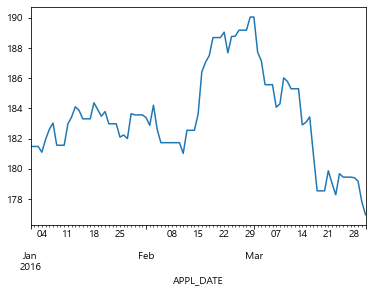

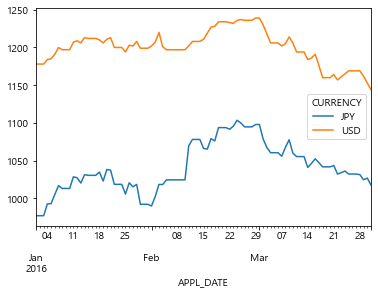

In [55]:
# 중국 위안화 별도 그림(엔화, 달러와 단위 차이)
df_curreny_pivot["CNY"].plot()
# 일본 엔화, 미국 달러
df_curreny_pivot[["JPY", "USD"]].plot()

### 그래프분석_Heatmap (P 80)

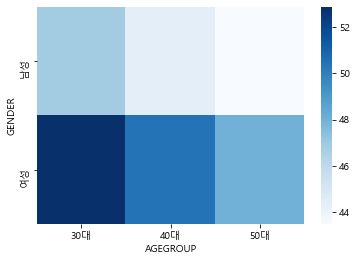

In [56]:
# 성별과 연령대별 혈당 산소 요구량 평균 계산, groupby: (성별, 연령), agg("mean"): 혈당 산소 요구량 평균값
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
# pivot(성별, 연령대, 혈당 산소 요구량): x축(연령대), y축(성별), 값(혈당산소요구량의 평균)으로 pivot
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, cmap="Blues")

### 그래프분석_등고선 (P 83)

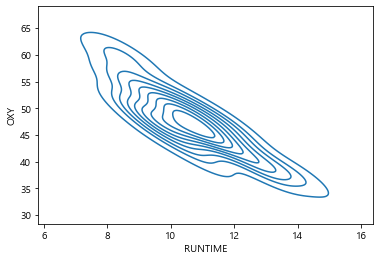

In [57]:
# kdeplot(x축, y축 , shade: 음영 선택 여부) 
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

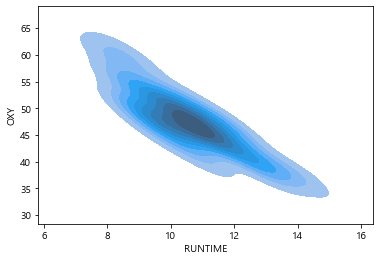

In [58]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = True)

### 그래프분석_Parallel Plot (P 86)

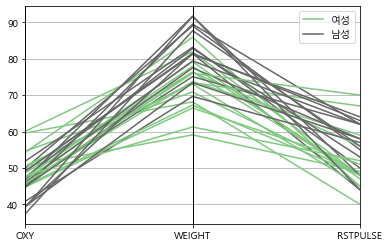

In [59]:
# parallel_coordinates(데이터, 그룹 변수, cols = 변수, colormap= 다양한 colormap지정)
pd.plotting.parallel_coordinates(df_fitness,"GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="Accent")

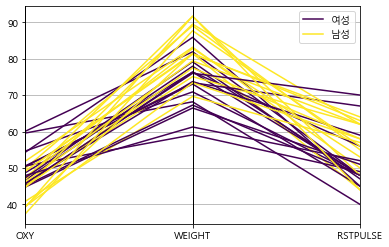

In [60]:
pd.plotting.parallel_coordinates(df_fitness,"GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="viridis")

### 그래프분석_Customizing (P 89)

Text(488.4227272727271, 0.5, '혈당 산소 요구량')

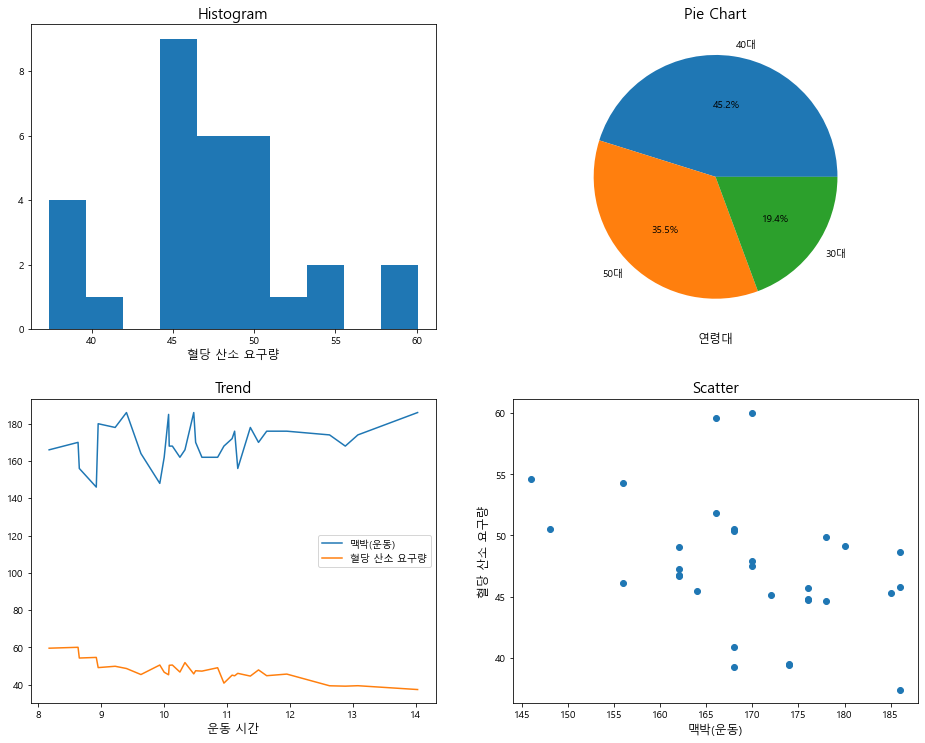

In [61]:
df_count = df_fitness["AGEGROUP"].value_counts() # Pie Chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (13, 10)) # (2, 2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5) # w_pad: 열 사이 간격, h_pad: 행 사이 간격

# Histogram
axes[0,0].hist(df_fitness["OXY"]) # [0,0] 위치에 Histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15) # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12) # x축 label 지정

# Pie Chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%") # [0,1] 위치에 Pie Chart 생성
axes[0,1].set_title("Pie Chart", fontsize = 15) 
axes[0,1].set_xlabel("연령대", fontsize = 12)

# Trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)") # [1, 0]  x축: 운동 시간, y축: 맥박(운동)
axes[1,0].plot("RUNTIME", "OXY", data = df_fitness, label = "혈당 산소 요구량") # x축: 운동 시간, y축: 산소 요구량
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("운동 시간", fontsize = 12)
axes[1,0].legend() # 범례 표시

# Scatter
axes[1,1].scatter("RUNPULSE", "OXY", data = df_fitness) # [1,1] 위치에 산점도 표시, x축: 맥박(운동) , y축: 산소 요구량
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)", fontsize = 12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize = 12)

### 타이타닉 탐색적 분석 (P 92)

In [62]:
# 데이터 불러오기
df_raw = pd.read_csv("C:/청년AI.BigData아카데미/data/titanic.csv", engine = "python")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# 데이터속성 및 요약통계량 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [64]:
df_raw.shape

(156, 12)

In [65]:
# 요약통계량
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


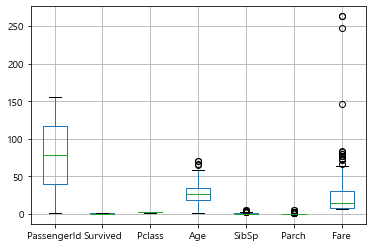

In [97]:
# 수치형변수의 확인
df_raw.boxplot()

In [66]:
# 목표변수 현황
survived_ratio = df_raw['Survived'].value_counts(sort=False)
survived_ratio

0    102
1     54
Name: Survived, dtype: int64

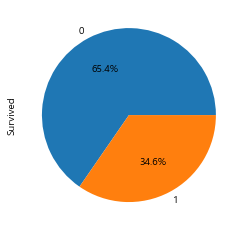

In [67]:
survived_ratio.plot.pie(y = 'Fare', autopct = '%.1f%%')

In [68]:
# 범주형변수별 현황
name_ratio = df_raw['Name'].value_counts(sort=False)
name_ratio

Kink, Mr. Vincenz                  1
McGowan, Miss. Anna "Annie"        1
Moore, Mr. Leonard Charles         1
Richard, Mr. Emile                 1
Moran, Miss. Bertha                1
                                  ..
Heikkinen, Miss. Laina             1
Connors, Mr. Patrick               1
Turpin, Mr. William John Robert    1
Jussila, Miss. Katriina            1
Stewart, Mr. Albert A              1
Name: Name, Length: 156, dtype: int64

In [69]:
sex_ratio = df_raw['Sex'].value_counts(sort=False)
sex_ratio

female     56
male      100
Name: Sex, dtype: int64

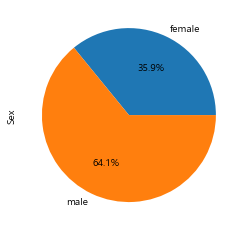

In [70]:
sex_ratio.plot.pie(y = 'Fare', autopct = '%.1f%%')

In [71]:
cabin_ratio = df_raw['Cabin'].value_counts(sort=False)
cabin_ratio

B30            1
E101           1
C83            1
B86            1
G6             1
A6             1
B28            1
D56            1
E31            1
F2             1
B78            1
D26            2
A5             1
B58 B60        1
F G73          1
C110           1
F E69          1
C123           2
C2             1
E46            1
D47            1
D33            1
F33            1
C23 C25 C27    2
C52            1
C85            1
D10 D12        1
C103           1
Name: Cabin, dtype: int64

In [72]:
embarked_ratio = df_raw['Embarked'].value_counts(sort=False)
embarked_ratio

C     32
Q     13
S    110
Name: Embarked, dtype: int64

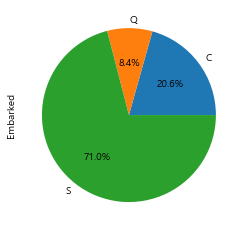

In [73]:
embarked_ratio.plot.pie(y = 'Fare', autopct = '%.1f%%')

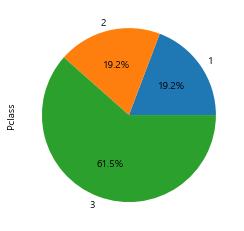

In [74]:
pclass = df_raw['Pclass'].value_counts(sort=False)
pclass.plot.pie(y = 'Fare', autopct = '%.1f%%')

In [75]:
# 결측치 확인
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [76]:
# Embarked 결측치는 빈도수가 많은 S로 대체
df_raw['Embarked'] = df_raw['Embarked'].fillna('S')
df_raw['Embarked'] = df_raw['Embarked'].astype(str)

In [77]:
# Age 결측치는 평균으로 대체
df_raw['Age'].fillna(df_raw['Age'].mean(), inplace=True)
df_raw['Age'] = df_raw['Age'].astype(int)

In [78]:
# Cabin 결측치는 "Gita"로 대체
df_raw['Cabin'] = df_raw['Cabin'].fillna('Gita')

In [79]:
df_raw.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [80]:
# 파생변수 생성
df_raw["Cabin_gb"] = df_raw['Cabin'].str.get(i=0)
df_raw.loc[df_raw['Age'] <= 14.2, 'Age_gb'] = 0
df_raw.loc[(df_raw['Age'] > 14.2) & (df_raw['Age'] <= 28.4), 'Age_gb'] = 1
df_raw.loc[(df_raw['Age'] > 28.4) & (df_raw['Age'] <= 42.6), 'Age_gb'] = 2
df_raw.loc[(df_raw['Age'] > 42.6) & (df_raw['Age'] <= 56.8), 'Age_gb'] = 3
df_raw.loc[df_raw['Age'] > 56.8, 'Age_gb'] = 4
df_raw['Age_gb'] = df_raw['Age_gb'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [81]:
df_raw.loc[df_raw['Fare'] <= 58, 'Fare_gb'] = 0
df_raw.loc[(df_raw['Fare'] > 58) & (df_raw['Fare'] <= 109.25), 'Fare_gb'] = 1
df_raw.loc[(df_raw['Fare'] > 109.25) & (df_raw['Fare'] <= 160.5), 'Fare_gb'] = 2
df_raw.loc[(df_raw['Fare'] > 160.5) & (df_raw['Fare'] <= 211.75), 'Fare_gb'] = 3
df_raw.loc[df_raw['Fare'] > 211.75, 'Fare_gb'] = 4
df_raw['Fare_gb'] = df_raw['Fare_gb'].astype(int)

In [82]:
df_raw["Family"] = df_raw["Parch"] + df_raw["SibSp"]
df_raw['Family'] = df_raw['Family'].astype(int)

In [83]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_gb,Age_gb,Fare_gb,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Gita,S,G,Young,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Gita,S,G,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,Middle,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Gita,S,G,Middle,0,0


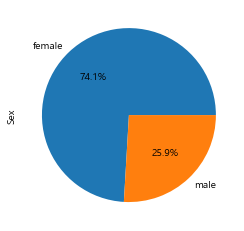

In [84]:
# 탐색적 분석 
survived = df_raw[df_raw['Survived'] == 1]['Sex'].value_counts()
dead = df_raw[df_raw['Survived'] == 0]['Sex'].value_counts()
survived.plot.pie(y = 'Fare', autopct = '%.1f%%')

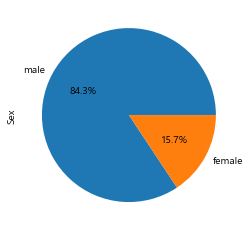

In [85]:
dead.plot.pie(y = 'Fare', autopct = '%.1f%%')

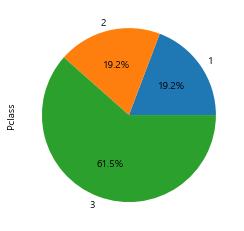

In [86]:
pclass = df_raw['Pclass'].value_counts(sort=False)
pclass.plot.pie(y = 'Fare', autopct = '%.1f%%')

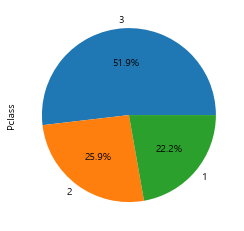

In [87]:
pclass1 = df_raw[df_raw['Survived'] == 1]['Pclass'].value_counts()
pclass1.plot.pie(y = 'Fare', autopct = '%.1f%%')

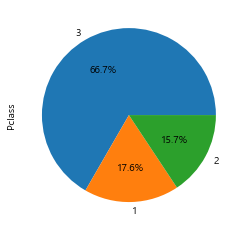

In [88]:
pclass0 = df_raw[df_raw['Survived'] == 0]['Pclass'].value_counts()
pclass0.plot.pie(y = 'Fare', autopct = '%.1f%%')

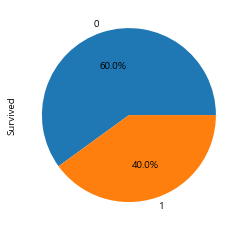

In [89]:
pclass1 = df_raw[df_raw['Pclass'] == 1]['Survived'].value_counts()
pclass1.plot.pie(y = 'Fare', autopct = '%.1f%%')

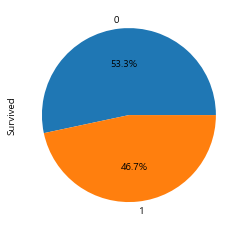

In [90]:
pclass2 = df_raw[df_raw['Pclass'] == 2]['Survived'].value_counts()
pclass2.plot.pie(y = 'Fare', autopct = '%.1f%%')

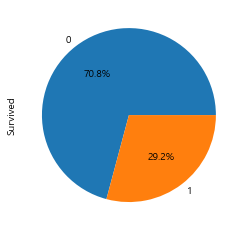

In [91]:
pclass3 = df_raw[df_raw['Pclass'] == 3]['Survived'].value_counts()
pclass3.plot.pie(y = 'Fare', autopct = '%.1f%%')

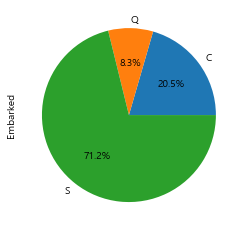

In [92]:
embarked = df_raw['Embarked'].value_counts(sort=False)
embarked.plot.pie(y = 'Fare', autopct = '%.1f%%')

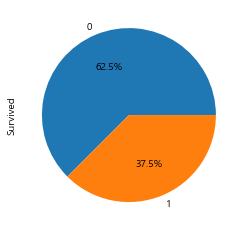

In [93]:
embarked1 = df_raw[df_raw['Embarked'] == 'C']['Survived'].value_counts()
embarked1.plot.pie(y = 'Fare', autopct = '%.1f%%')

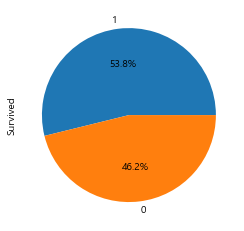

In [94]:
embarked2 = df_raw[df_raw['Embarked'] == 'Q']['Survived'].value_counts()
embarked2.plot.pie(y = 'Fare', autopct = '%.1f%%')

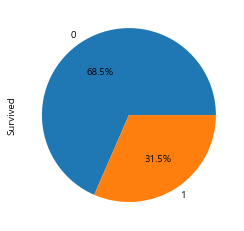

In [95]:
embarked3 = df_raw[df_raw['Embarked'] == 'S']['Survived'].value_counts()
embarked3.plot.pie(y = 'Fare', autopct = '%.1f%%')

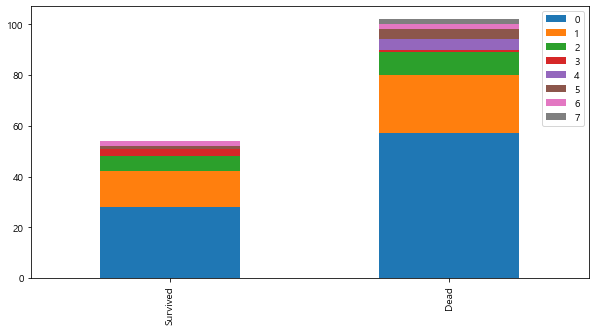

In [96]:
survived = df_raw[df_raw['Survived']==1]['Family'].value_counts()
dead = df_raw[df_raw['Survived']==0]['Family'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

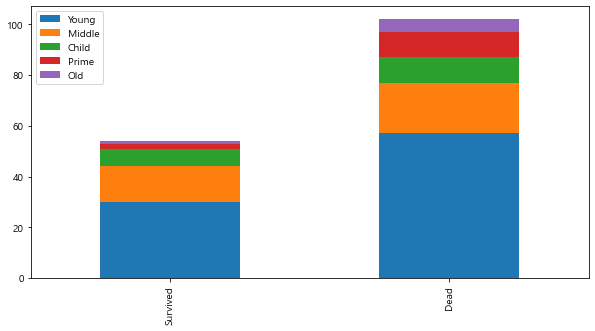

In [97]:
survived = df_raw[df_raw['Survived']==1]['Age_gb'].value_counts()
dead = df_raw[df_raw['Survived']==0]['Age_gb'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

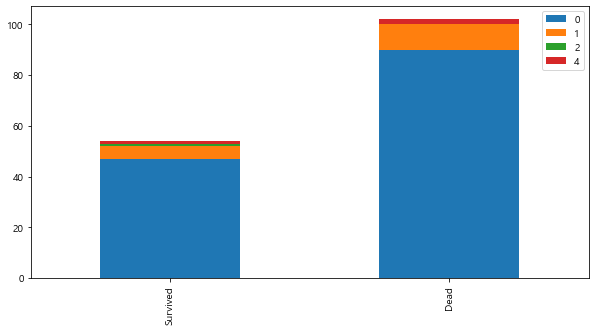

In [98]:
survived = df_raw[df_raw['Survived']==1]['Fare_gb'].value_counts()
dead = df_raw[df_raw['Survived']==0]['Fare_gb'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))